In [1]:
#Dataset: https://www.kaggle.com/datasets/colewelkins/cardiovascular-disease

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fh = pd.read_csv('C:/Users/tsfra/OneDrive/Documents/data622/datasets/fetal_health.csv')
fh['fh_int'] = fh['fetal_health'].astype(int)

In [4]:
print(fh.columns)
display(fh.head(5))

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health', 'fh_int'],
      dtype='object')


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,fh_int
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0,2
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0,1
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0,1
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0,1
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0,1


In [5]:
display(fh[(fh.isnull()) | (fh.isna())].sum())

baseline value                                            0.0
accelerations                                             0.0
fetal_movement                                            0.0
uterine_contractions                                      0.0
light_decelerations                                       0.0
severe_decelerations                                      0.0
prolongued_decelerations                                  0.0
abnormal_short_term_variability                           0.0
mean_value_of_short_term_variability                      0.0
percentage_of_time_with_abnormal_long_term_variability    0.0
mean_value_of_long_term_variability                       0.0
histogram_width                                           0.0
histogram_min                                             0.0
histogram_max                                             0.0
histogram_number_of_peaks                                 0.0
histogram_number_of_zeroes                                0.0
histogra

In [8]:
display(fh.describe())

,age,height,weight,ap_hi,ap_lo,bmi
count,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000
mean,19462.667737,164.372861,74.100688,126.434924,81.263925,27.510513
std,2468.381854,8.176756,14.288862,15.961685,9.143985,6.026497
min,10798.000000,55.000000,11.000000,90.000000,60.000000,3.471784
25%,17656.000000,159.000000,65.000000,120.000000,80.000000,23.875115
50%,19700.000000,165.000000,72.000000,120.000000,80.000000,26.346494
75%,21323.000000,170.000000,82.000000,140.000000,90.000000,30.116213
max,23713.000000,250.000000,200.000000,180.000000,120.000000,298.666667


In [6]:
fh.loc[fh['fh_int'] == 1, 'fetal_health'] = 'Normal'
fh.loc[fh['fh_int'] == 2, 'fetal_health'] = 'Suspect'
fh.loc[fh['fh_int'] == 3, 'fetal_health'] = 'Pathological'

fh['fetal_health'] = pd.Categorical(fh['fetal_health'], 
                                    ordered=True)

In [9]:
import plotly.express as px

for i in fh.columns[:-2]:
    fig = px.box(fh, 
                    y=fh[i], 
                    color='fetal_health', 
                    category_orders={
                        'cardio_label': ['Normal', 'Suspect', 'Pathological']
                        }
                )
    fig.update_layout(title=f"{i}")
    fig.update_yaxes(title=None)
    fig.show()

#for i in [i for i in fh.columns if i in fh]:
#    CrosstabResult=pd.crosstab(index=fh[i],columns=fh['fetal_health'])
#    CrosstabResult.plot.bar()



### Split and Scale the data

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
X = fh.loc[:, [col for col in fh if col not in ['fh_int', 'fetal_health']]].values
y = fh['fh_int'].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

sc = StandardScaler()

X = sc.fit_transform(X)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression 
  
logreg = LogisticRegression() 
logreg.fit(X_train, y_train)

logreg_predict = logreg.predict(X_test)

In [16]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
)

results_df = pd.DataFrame({"Actual": y_test, "Predicted": logreg_predict})
display(results_df[results_df["Actual"] != results_df["Predicted"]].head(10))

logreg_accuracy = accuracy_score(logreg_predict, y_test)
f1 = f1_score(logreg_predict, y_test, average="weighted")

print("Accuracy: ", logreg_accuracy)
print("F1 Score: ", f1)

,Actual,Predicted
3,1,2
38,3,2
58,2,1
71,2,1
86,1,2
90,2,1
129,3,2
133,2,1
141,1,2
144,1,2


Accuracy:  0.8966165413533834
F1 Score:  0.8972191186006976


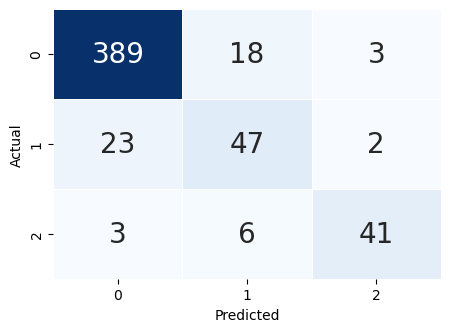

In [17]:
import seaborn as sns

cm = confusion_matrix(y_test, logreg_predict) 

plt.figure(figsize = (5, 3.5))
ax = sns.heatmap(cm, cmap='Blues', cbar=False, annot=True, fmt=".0f", annot_kws={"size": 20}, linewidth=0.5)
ax.set(xlabel="Predicted", ylabel="Actual")
plt.show()

In [18]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

model = LogisticRegression()
model.fit(X, y)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)

logreg_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(logreg_scores))

0.8952697315971302


### K-Nearest Neighbors

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

knn_predict = knn.predict(X_test)

In [20]:
results_df = pd.DataFrame({"Actual": y_test, "Predicted": knn_predict})
display(results_df[results_df["Actual"] != results_df["Predicted"]].head(10))

knn_accuracy = accuracy_score(knn_predict, y_test)
f1 = f1_score(knn_predict, y_test, average="weighted")

print("Accuracy: ", knn_accuracy)
print("F1 Score: ", f1)

,Actual,Predicted
38,3,2
58,2,1
63,2,1
65,2,1
71,2,1
90,2,1
100,1,2
116,2,1
129,3,2
136,2,3


Accuracy:  0.900375939849624
F1 Score:  0.904384060118633


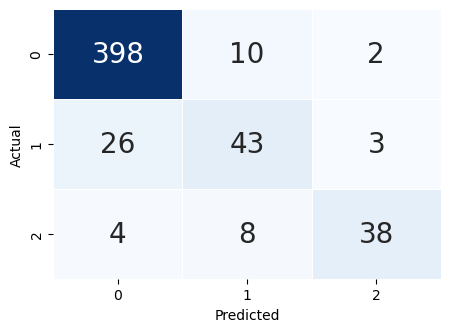

In [21]:
cm = confusion_matrix(y_test, knn_predict) 

plt.figure(figsize = (5, 3.5))
ax = sns.heatmap(cm, cmap='Blues', cbar=False, annot=True, fmt=".0f", annot_kws={"size": 20}, linewidth=0.5)
ax.set(xlabel="Predicted", ylabel="Actual")
plt.show()

In [22]:
k_values = [i for i in range(1,31)]
scores = []

sc = StandardScaler()

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

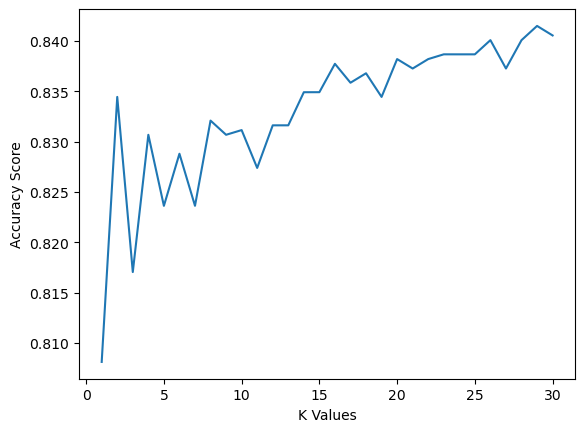

In [23]:
sns.lineplot(x = k_values, y = scores)
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [42]:
chosen_k = 20

model = KNeighborsClassifier(n_neighbors=chosen_k)
model.fit(X, y)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)

knn_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(knn_scores))

0.8904102813948681


### Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

gnb_predict = gnb.predict(X_test)

In [26]:
results_df = pd.DataFrame({"Actual": y_test, "Predicted": gnb_predict})
display(results_df[results_df["Actual"] != results_df["Predicted"]].head(10))

gnb_accuracy = accuracy_score(gnb_predict, y_test)
f1 = f1_score(gnb_predict, y_test, average="weighted")

print("Accuracy: ", gnb_accuracy)
print("F1 Score: ", f1)

,Actual,Predicted
0,1,2
2,1,2
3,1,2
7,1,2
14,1,2
16,1,2
38,3,2
40,1,2
51,1,2
54,1,2


Accuracy:  0.7124060150375939
F1 Score:  0.6753384886146514


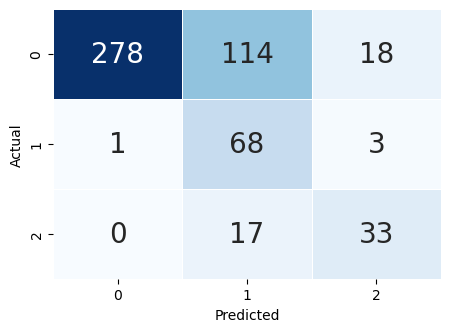

In [27]:
cm = confusion_matrix(y_test, gnb_predict) 

plt.figure(figsize = (5, 3.5))
ax = sns.heatmap(cm, cmap='Blues', cbar=False, annot=True, fmt=".0f", annot_kws={"size": 20}, linewidth=0.5)
ax.set(xlabel="Predicted", ylabel="Actual")
plt.show()

In [28]:
from sklearn.model_selection import RepeatedStratifiedKFold

model = GaussianNB()
model.fit(X, y)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)

gnb_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(gnb_scores))


0.7332905187941064


### Linear Discriminant Analysis

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
lda.fit(X_train, y_train)
lda_predict = lda.predict(X_test)

In [30]:
results_df = pd.DataFrame({"Actual": y_test, "Predicted": lda_predict})
display(results_df[results_df["Actual"] != results_df["Predicted"]].head(10))

lda_accuracy = accuracy_score(lda_predict, y_test)
f1 = f1_score(lda_predict, y_test, average="weighted")

print("Accuracy: ", lda_accuracy)
print("F1 Score: ", f1)

,Actual,Predicted
9,2,1
16,1,3
23,3,1
38,3,2
52,2,1
58,2,1
63,2,1
71,2,1
86,1,2
90,2,1


Accuracy:  0.8740601503759399
F1 Score:  0.8768812410383443


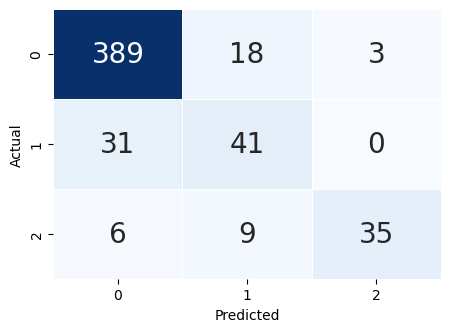

In [31]:
cm = confusion_matrix(y_test, lda_predict) 

plt.figure(figsize = (5, 3.5))
ax = sns.heatmap(cm, cmap='Blues', cbar=False, annot=True, fmt=".0f", annot_kws={"size": 20}, linewidth=0.5)
ax.set(xlabel="Predicted", ylabel="Actual")
plt.show()

In [32]:
model = LDA()
model.fit(X, y)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

lda_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(lda_scores))

0.8763065816281335


### Quadratic Discriminant Analysis

In [33]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

qda = QDA()
qda.fit(X_train, y_train)
qda_predict = qda.predict(X_test)

c:\Users\tsfra\anaconda3\envs\data622\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning:

Variables are collinear



In [34]:
results_df = pd.DataFrame({"Actual": y_test, "Predicted": qda_predict})
display(results_df[results_df["Actual"] != results_df["Predicted"]].head(10))

qda_accuracy = accuracy_score(qda_predict, y_test)
f1 = f1_score(qda_predict, y_test, average="weighted")

print("Accuracy: ", qda_accuracy)
print("F1 Score: ", f1)

,Actual,Predicted
0,1,2
2,1,2
3,1,2
7,1,2
12,1,2
13,1,2
16,1,3
17,1,2
18,1,2
20,1,2


Accuracy:  0.6165413533834586
F1 Score:  0.5624514394304724


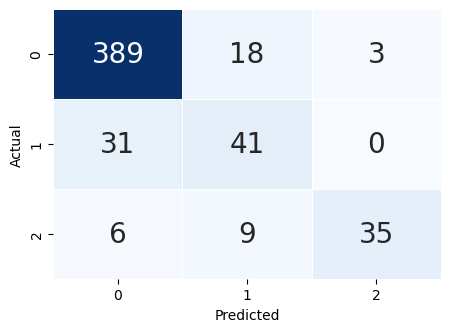

In [35]:
cm = confusion_matrix(y_test, lda_predict) 

plt.figure(figsize = (5, 3.5))
ax = sns.heatmap(cm, cmap='Blues', cbar=False, annot=True, fmt=".0f", annot_kws={"size": 20}, linewidth=0.5)
ax.set(xlabel="Predicted", ylabel="Actual")
plt.show()

In [36]:
model = QDA()
model.fit(X, y)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

qda_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(qda_scores))

0.5904619541146249


c:\Users\tsfra\anaconda3\envs\data622\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning:

Variables are collinear



### Compare Models

In [43]:
scores_df = pd.DataFrame({
    'Logistic Regression':[np.mean(logreg_scores)],
    'K Nearest Neighbors (k=20)':[np.mean(knn_scores)],
    'Gaussian Naive Bayes':[np.mean(gnb_scores)],
    'Linear Discriminant Analysis':[np.mean(lda_scores)],
    'Quadratic Discriminant Analysis':[np.mean(qda_scores)]
}
)

scores_df.index = ['Mean Accuracy']
display(scores_df)

,Logistic Regression,K Nearest Neighbors (k=20),Gaussian Naive Bayes,Linear Discriminant Analysis,Quadratic Discriminant Analysis
Mean Accuracy,0.89527,0.89041,0.733291,0.876307,0.590462
